In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import joblib

In [2]:
# Step 1: Load the dataset
data = pd.read_csv('Renewable_Energy_Adoption.csv')

In [3]:
# Step 2: Display the first few rows of the dataset
print("First five rows of the dataset:")
data.head()

First five rows of the dataset:


,carbon_emissions,energy_output,renewability_index,cost_efficiency,adoption
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [4]:
# Step 3: Check for missing values and basic summary statistics
print("\nMissing values in the dataset:")
data.isnull().sum()


Missing values in the dataset:


carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
adoption              0
dtype: int64

In [5]:
print("\nSummary statistics of the dataset:")
data.describe()


Summary statistics of the dataset:


,carbon_emissions,energy_output,renewability_index,cost_efficiency,adoption
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


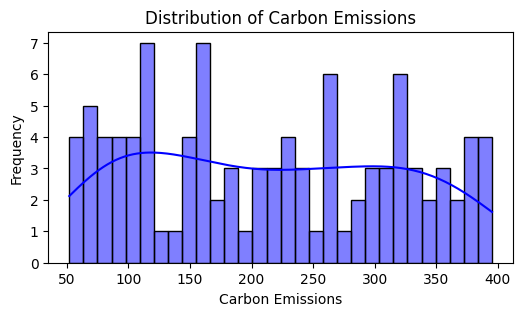

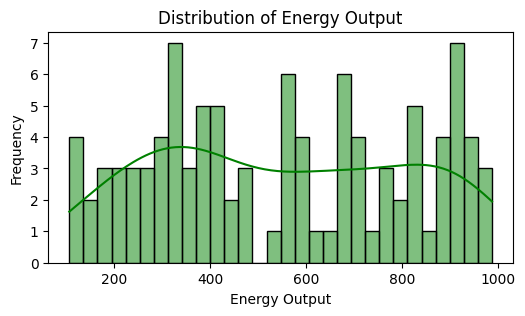

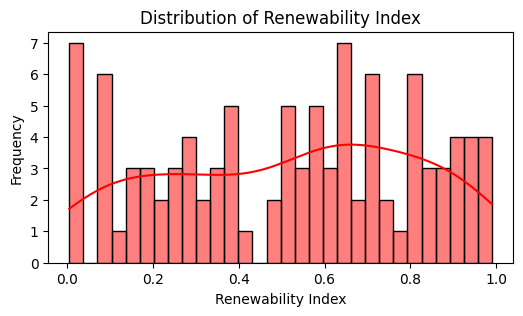

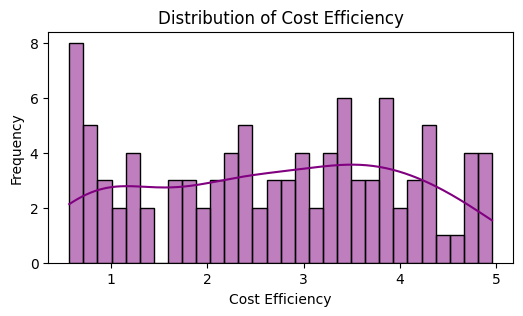

In [6]:
# Step 4: Visualize the distribution of key features
plt.figure(figsize=(6, 3))
sns.histplot(data['carbon_emissions'], kde=True, color='blue', bins=30)
plt.title('Distribution of Carbon Emissions')
plt.xlabel('Carbon Emissions')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(data['energy_output'], kde=True, color='green', bins=30)
plt.title('Distribution of Energy Output')
plt.xlabel('Energy Output')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(data['renewability_index'], kde=True, color='red', bins=30)
plt.title('Distribution of Renewability Index')
plt.xlabel('Renewability Index')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(data['cost_efficiency'], kde=True, color='purple', bins=30)
plt.title('Distribution of Cost Efficiency')
plt.xlabel('Cost Efficiency')
plt.ylabel('Frequency')
plt.show()

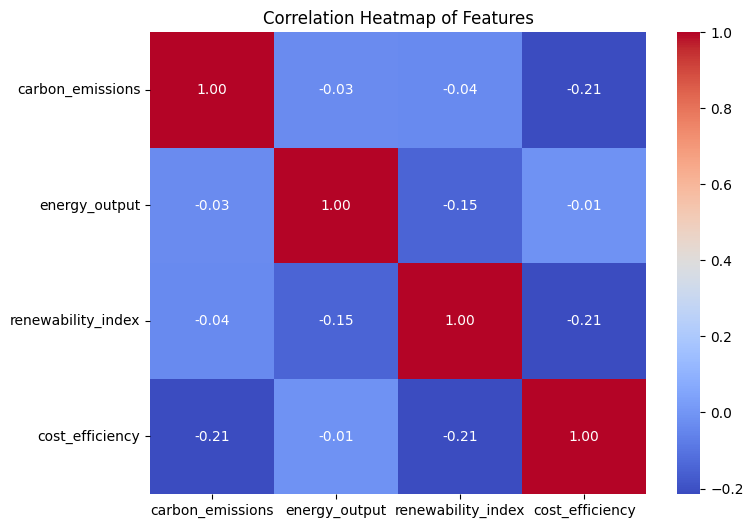

In [7]:
# Step 5: Correlation heatmap to understand relationships between features
correlation_matrix = data[['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

In [8]:
# Step 6: Prepare the data for model training

# Features (X) and Target variable (y)
X = data[['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']]
y = data['adoption']  # Target variable

In [9]:
# Step 7: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Step 8: Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiting max depth to avoid overfitting
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [11]:
# Step 9: Make predictions on the test set
y_pred = model.predict(X_test)

In [12]:
# Step 10: Evaluate the model

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the Decision Tree Model:", accuracy)


Accuracy of the Decision Tree Model: 0.85


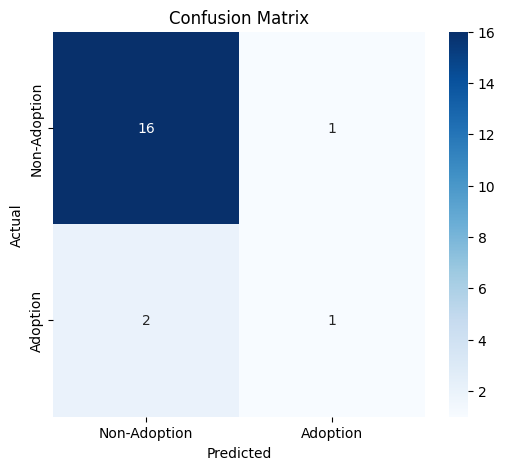

In [13]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Adoption', 'Adoption'], 
            yticklabels=['Non-Adoption', 'Adoption'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Adoption', 'Adoption']))



Classification Report:
              precision    recall  f1-score   support

Non-Adoption       0.89      0.94      0.91        17
    Adoption       0.50      0.33      0.40         3

    accuracy                           0.85        20
   macro avg       0.69      0.64      0.66        20
weighted avg       0.83      0.85      0.84        20



In [15]:
# Load the dataset
data = pd.read_csv('Renewable_Energy_Adoption.csv')
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,adoption
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [16]:
X = data[['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']]
y = data['adoption']  # Target variable

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize the model with a specified max depth to prevent overfitting
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [20]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.85


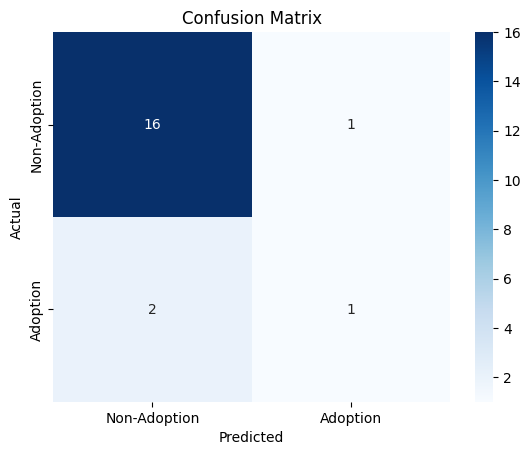

In [21]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Adoption', 'Adoption'], 
            yticklabels=['Non-Adoption', 'Adoption'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=['Non-Adoption', 'Adoption']))

              precision    recall  f1-score   support

Non-Adoption       0.89      0.94      0.91        17
    Adoption       0.50      0.33      0.40         3

    accuracy                           0.85        20
   macro avg       0.69      0.64      0.66        20
weighted avg       0.83      0.85      0.84        20



In [23]:
import joblib
# Save the model to a file
joblib.dump(model, 'Renewable_Energy_Adoption_model.pkl')

['Renewable_Energy_Adoption_model.pkl']

In [24]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,adoption
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


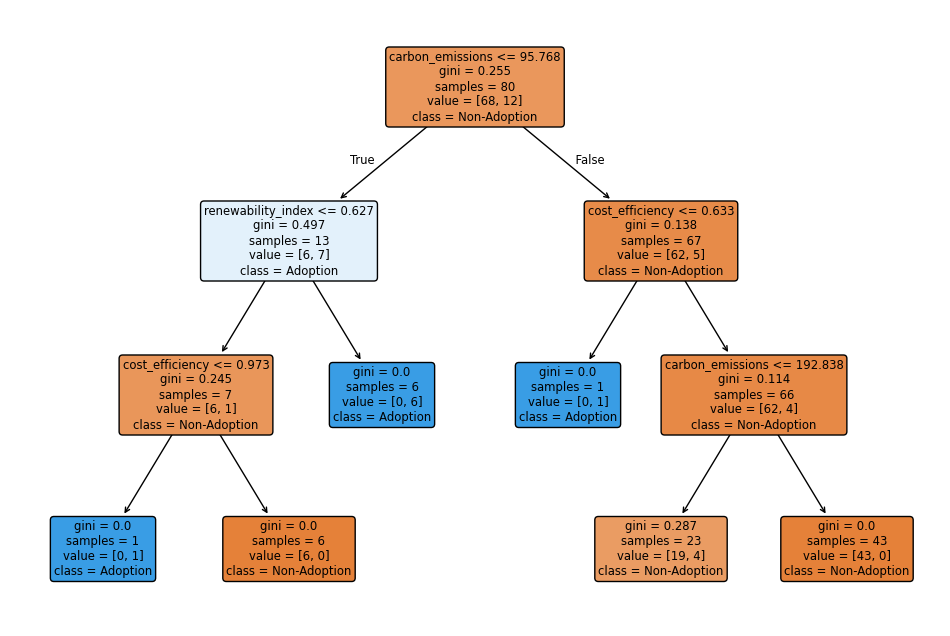

In [25]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Non-Adoption', 'Adoption'], filled=True, rounded=True)
plt.savefig('dt1.png')
plt.show()